In [368]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
#set ggplot style
# plt.style.use('ggplot')

In [369]:
duplicatejoins = pd.read_csv('rawdata/duplicate-joins.tsv', sep='\t')
kval = '01'
duplicatejoins = duplicatejoins[duplicatejoins['size']== str(kval) + 'k_rows']
duplicatejoins.head()

,tool,size,%involved,duplicates,totaltime,time-first,n# of results
0,rdfizer,01k_rows,5,3,1.760230,1.343194,NaN
1,rdfizer,01k_rows,5,5,1.792646,1.362092,NaN
2,rdfizer,01k_rows,5,10,1.786857,1.349854,NaN
3,rdfizer,01k_rows,5,20,1.879879,1.421548,NaN
4,rdfizer,01k_rows,10,3,1.801823,1.356970,NaN


In [370]:
duplicatejoins = duplicatejoins[['tool', 'size', 'duplicates', '%involved',  'totaltime']]
duplicatejoins

,tool,size,duplicates,%involved,totaltime
0,rdfizer,01k_rows,3,5,1.760230
1,rdfizer,01k_rows,5,5,1.792646
2,rdfizer,01k_rows,10,5,1.786857
3,rdfizer,01k_rows,20,5,1.879879
4,rdfizer,01k_rows,3,10,1.801823
5,rdfizer,01k_rows,5,10,1.806372
6,rdfizer,01k_rows,10,10,1.789289
7,rdfizer,01k_rows,20,10,1.908136
8,rdfizer,01k_rows,3,20,1.803110
9,rdfizer,01k_rows,5,20,1.797212


### Config 1

In [371]:
c1 = duplicatejoins[duplicatejoins['%involved'].isin([5, 10, 20])]
c1.head()

,tool,size,duplicates,%involved,totaltime
0,rdfizer,01k_rows,3,5,1.760230
1,rdfizer,01k_rows,5,5,1.792646
2,rdfizer,01k_rows,10,5,1.786857
3,rdfizer,01k_rows,20,5,1.879879
4,rdfizer,01k_rows,3,10,1.801823


In [372]:
c1.shape

(24, 5)

In [373]:
c1 = c1.sort_values(by=['size', '%involved', 'duplicates'])
c1 = c1.reset_index(drop=True)
c1

,tool,size,duplicates,%involved,totaltime
0,rdfizer,01k_rows,3,5,1.760230
1,rmlmapper,01k_rows,3,5,1.587765
2,rdfizer,01k_rows,5,5,1.792646
3,rmlmapper,01k_rows,5,5,1.383904
4,rdfizer,01k_rows,10,5,1.786857
5,rmlmapper,01k_rows,10,5,1.542989
6,rdfizer,01k_rows,20,5,1.879879
7,rmlmapper,01k_rows,20,5,1.573475
8,rdfizer,01k_rows,3,10,1.801823
9,rmlmapper,01k_rows,3,10,1.582077


### Config 2

In [374]:
c2 = duplicatejoins[duplicatejoins['%involved'].isin([30, 40, 50])]
c2.head()

,tool,size,duplicates,%involved,totaltime
12,rdfizer,01k_rows,3,30,1.808112
13,rdfizer,01k_rows,5,30,1.775898
14,rdfizer,01k_rows,10,30,1.854628
15,rdfizer,01k_rows,20,30,1.850754
16,rdfizer,01k_rows,3,40,1.721213


In [375]:
c2.shape

(24, 5)

In [376]:
c2 = c2.sort_values(by=['size', '%involved', 'duplicates'])
c2 = c2.reset_index(drop=True)
c2.head()

,tool,size,duplicates,%involved,totaltime
0,rdfizer,01k_rows,3,30,1.808112
1,rmlmapper,01k_rows,3,30,1.512632
2,rdfizer,01k_rows,5,30,1.775898
3,rmlmapper,01k_rows,5,30,1.666350
4,rdfizer,01k_rows,10,30,1.854628


In [377]:
import itertools
comb = list(itertools.permutations(list(range(1, 5)), 2))
comb.append((1,1))
comb.append((2,2))
comb.append((3,3))
comb.append((4,4))
comb = sorted(comb)

In [378]:
xydf = pd.DataFrame(comb, columns=['Configurations', 'Configuration'])
tools = ['rdfizer', 'rmlmapper']
configs = [c1, c2]
confignames = ['Low_Dup', 'High_Dup']
z = {'z': [], 'xtick': [], 'ytick': []}
colors = {'c': []}
for row in xydf.iterrows():
    ix = row[0]
    x = row[1][0]
    y = row[1][1]
    # print(ix, x, y)
    xix = 0 if 4/x >= 2 else 1
    xtool = tools[xix]
    yix = 0 if 4/y >= 2 else 1
    ytool = tools[yix]
    
    xconfigix = 1 if x%2 == 0 else (x % 2 - 1)
    xconfig = configs[xconfigix]    
    yconfigix = 1 if y%2 == 0 else (y % 2 - 1)
    yconfig = configs[yconfigix]
    
    z['xtick'].append(xtool+'-'+ confignames[xconfigix])
    z['ytick'].append(ytool+'-'+ confignames[yconfigix])
    
    v = np.corrcoef( xconfig[((xconfig['tool']== xtool))]['totaltime'],
                        yconfig[((yconfig['tool']==ytool))]['totaltime']
                    )[0, 1] 
    
    k = v
    if k > 0.999999999:
            c = "#e7eff6"            
    elif k < 0:
        c = '#fe4a49'
    else:
        c = '#03396c'
    colors['c'].append(c)
    z['z'].append(np.abs(v))

In [379]:
xydf['z'] = z['z']
xydf['xtick'] = z['xtick']
xydf['ytick'] = z['ytick']

xydf

,Configurations,Configuration,z,xtick,ytick
0,1,1,1.000000,rdfizer-Low_Dup,rdfizer-Low_Dup
1,1,2,0.030646,rdfizer-Low_Dup,rdfizer-High_Dup
2,1,3,0.151255,rdfizer-Low_Dup,rmlmapper-Low_Dup
3,1,4,0.409712,rdfizer-Low_Dup,rmlmapper-High_Dup
4,2,1,0.030646,rdfizer-High_Dup,rdfizer-Low_Dup
5,2,2,1.000000,rdfizer-High_Dup,rdfizer-High_Dup
6,2,3,0.095728,rdfizer-High_Dup,rmlmapper-Low_Dup
7,2,4,0.024958,rdfizer-High_Dup,rmlmapper-High_Dup
8,3,1,0.151255,rmlmapper-Low_Dup,rdfizer-Low_Dup
9,3,2,0.095728,rmlmapper-Low_Dup,rdfizer-High_Dup


In [380]:
xt = xydf.xtick.unique()
xt

array(['rdfizer-Low_Dup', 'rdfizer-High_Dup', 'rmlmapper-Low_Dup',
       'rmlmapper-High_Dup'], dtype=object)

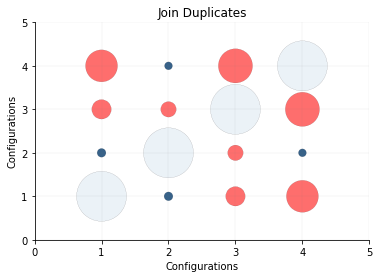

In [381]:
colors = pd.DataFrame(colors)
xt = xydf.xtick.unique()
ploto = xydf.plot.scatter('Configurations', 'Configuration', s=xydf.z * 2500, color=colors.c, alpha=0.8, edgecolors="black", linewidth=.1)
ploto.set_title('Join Duplicates')
ploto.set_xlabel('Configurations')
ploto.set_ylabel('Configurations')

ploto.set_xticks([0,1,2,3,4,5])
ploto.set_yticks([0,1,2,3,4,5])
# ploto.set_xticklabels(['rdfizer-Low_Dup', 
#                        'rdfizer-High_Dup', 
#                        'rmlmapper-Low_Dup',
#                        'rmlmapper-High_Dup'], 
#                     rotation=90)
# ploto.set_yticklabels(['rdfizer-Low_Dup', 
#                        'rdfizer-High_Dup', 
#                        'rmlmapper-Low_Dup',
#                        'rmlmapper-High_Dup'])
# ploto.set_yticklabels(xydf.ytick)
ploto.spines['top'].set_visible(False)
ploto.spines['right'].set_visible(False)
#adds major gridlines
ploto.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
#adds legend
#ploto.legend(categories.unique())
plt.figure(figsize=(35, 4)) 

In [382]:
# !mkdir figures/dexa
fig = ploto.get_figure()
fig.savefig("duplicate_joins_"+ str(kval) + "k_bubble.png", dpi=300, bbox_inches='tight')